# Normalization by incidence angle

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os 
import sys

import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns

root_path = os.path.abspath("..")
if root_path not in sys.path:
    sys.path.append(root_path)

In [3]:
from common.dataflow import get_train_df, get_test_df, get_image, get_target, get_inc_angle
from common.dataflow_visu_utils import display_image

In [4]:
train_df = get_train_df()
train_df = train_df.copy()

In [5]:
train_df.head()

band_1  \
0  [-27.878360999999998, -27.15416, -28.668615, -...   
1  [-12.242375, -14.920304999999999, -14.920363, ...   
2  [-24.603676, -24.603714, -24.871029, -23.15277...   
3  [-22.454607, -23.082819, -23.998013, -23.99805...   
4  [-26.006956, -23.164886, -23.164886, -26.89116...   

                                              band_2        id  inc_angle  \
0  [-27.154118, -29.537888, -31.0306, -32.190483,...  dfd5f913    43.9239   
1  [-31.506321, -27.984554, -26.645678, -23.76760...  e25388fd    38.1562   
2  [-24.870956, -24.092632, -20.653963, -19.41104...  58b2aaa0    45.2859   
3  [-27.889421, -27.519794, -27.165262, -29.10350...  4cfc3a18    43.8306   
4  [-27.206915, -30.259186, -30.259186, -23.16495...  271f93f4    35.6256   

   is_iceberg  
0           0  
1           0  
2           1  
3           0  
4           0

In [6]:
# train_df.loc[:, 'nband_1'] = train_df['band_1'].apply(lambda x: np.array(x)) - train_df['inc_angle'] * 0.095
# train_df.loc[:, 'nband_2'] = train_df['band_2'].apply(lambda x: np.array(x)) - train_df['inc_angle'] * 0.095

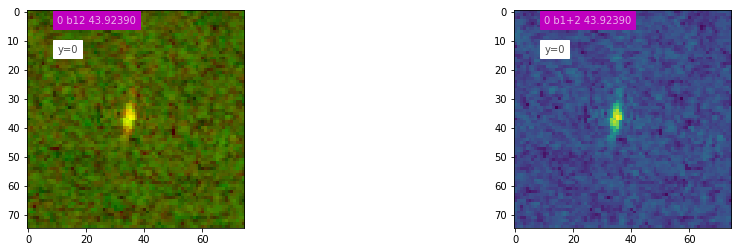

In [6]:
id_num = 0
x = get_image(id_num, train_df)
y = get_target(id_num, train_df)
inc_angle = get_inc_angle(id_num, train_df)

plt.figure(figsize=(16,4))
ax = plt.subplot(121)
display_image(ax, x, id_num, "b12", inc_angle, y)
ax = plt.subplot(122)
display_image(ax, 0.5*(x[:, :, 0] + x[:, :, 1]), id_num, "b1+2", inc_angle, y)


Method to observe signal vs incidence angle dependency

Article: Incidence angle Normalization of Wide Swath SAR Data for Oceanographic Applications

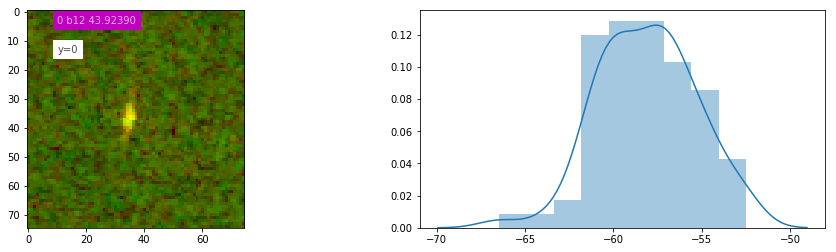

In [8]:
id_num = 0
x = get_image(id_num, train_df)
y = get_target(id_num, train_df)
inc_angle = get_inc_angle(id_num, train_df)

line1 = x[12, :, 0]
line2 = x[12, :, 1]

line1a = x[:, 12, 0]
line2a = x[:, 12, 1]


plt.figure(figsize=(16,4))
ax = plt.subplot(121)
display_image(ax, x, id_num, "b12", inc_angle, y)
ax = plt.subplot(122)
sns.distplot(line1 + line2)

# display_image(ax, 0.5*(x[:, :, 0] + x[:, :, 1]), id_num, "b1+2", inc_angle, y)


In [9]:
import pandas as pd

In [10]:
signal_vs_inc_angle_df = pd.DataFrame()
signal_vs_inc_angle_df.loc[:, 'inc_angle'] = train_df['inc_angle']
signal_vs_inc_angle_df.loc[:, 'is_iceberg'] = train_df['is_iceberg']

In [85]:
from functools import partial

def get_line_value(b, i):
    y = 12
    return b[75 * i + y]

for i in range(75):
    signal_vs_inc_angle_df.loc[:, "b1_%i" % i] = train_df['band_1'].apply(partial(get_line_value, i=i))
    signal_vs_inc_angle_df.loc[:, "b2_%i" % i] = train_df['band_2'].apply(partial(get_line_value, i=i))    

In [86]:
signal_vs_inc_angle_df.head()

inc_angle  is_iceberg       b1_0       b2_0       b1_1       b2_1  \
0    43.9239           0 -28.264969 -30.504444 -30.007973 -29.538349   
1    38.1562           0 -18.204786 -25.762188 -17.747530 -28.740969   
2    45.2859           1 -26.347132 -23.848358 -23.153114 -23.378735   
3    43.8306           0 -20.638969 -30.515509 -21.145086 -28.680099   
4    35.6256           0 -22.770674 -25.731926 -22.770674 -25.731926   

        b1_2       b2_2       b1_3       b2_3    ...          b1_70  \
0 -30.007973 -30.007973 -27.878866 -30.504444    ...     -31.031570   
1 -16.699768 -25.762188 -18.812498 -26.341518    ...     -14.528728   
2 -21.349583 -20.995007 -22.509422 -22.105352    ...     -18.988087   
3 -20.638969 -29.549416 -20.160725 -29.549416    ...     -22.869234   
4 -22.965937 -28.600435 -23.370007 -30.259918    ...     -25.732927   

       b2_70      b1_71      b2_71      b1_72      b2_72      b1_73  \
0 -29.538898 -28.669584 -29.093370 -30.008562 -28.669626 -30.505035   
1 -24.226263 -17.104712 -23.769005 -17.104712 -23.769005 -16.505447   
2 -21.719740 -22.509911 -25.147663 -23.610899 -25.726974 -24.604656   
3 -31.603086 -23.303619 -29.549839 -21.500088 -30.019459 -21.320990   
4 -23.166559 -26.293568 -23.794794 -29.391609 -25.732994 -26.008760   

       b2_73      b1_74      b2_74  
0 -27.879456 -27.155212 -27.879456  
1 -23.334620 -12.605972 -24.960777  
2 -24.871937 -20.654869 -25.726974  
3 -29.549839 -23.529240 -28.680525  
4 -28.601437 -26.588036 -26.892834  

[5 rows x 152 columns]

In [87]:
for i in range(75):
    assert np.abs(signal_vs_inc_angle_df.loc[0, 'b1_%i' % i] - line1a[i]) < 1e-5, \
        "{} : {} vs {}".format(i, signal_vs_inc_angle_df.loc[0, 'b1_%i' % i], line1a[i])
        
for i in range(75):
    assert np.abs(signal_vs_inc_angle_df.loc[0, 'b2_%i' % i] - line2a[i]) < 1e-5, \
        "{} : {} vs {}".format(i, signal_vs_inc_angle_df.loc[0, 'b2_%i' % i], line2a[i])        

In [109]:
def display_scatter_signal_vs_inc_angle(df, band, range_vals=None):
    plt.figure(figsize=(8, 8))
    plt.suptitle("%s vs Inc angle" % band)
    range_vals = list(range(75)) if range_vals is None else range_vals
    for i in range_vals:
        plt.scatter(df['inc_angle'], df['%s_%i' % (band, i)], c='b', s=0.15, marker='.')
    plt.xlabel("incidence angle")
    plt.ylabel("sigma")
    
def display_scatter_b12_vs_inc_angle(df, range_vals=None):
    plt.figure(figsize=(8, 8))
    plt.suptitle("b12 vs Inc angle")
    range_vals = list(range(75)) if range_vals is None else range_vals
    for i in range_vals:
        plt.scatter(df['inc_angle'], df['b1_%i' % i] + df['b2_%i' % i], c='b', s=0.15, marker='.')
    plt.xlabel("incidence angle")
    plt.ylabel("b12")

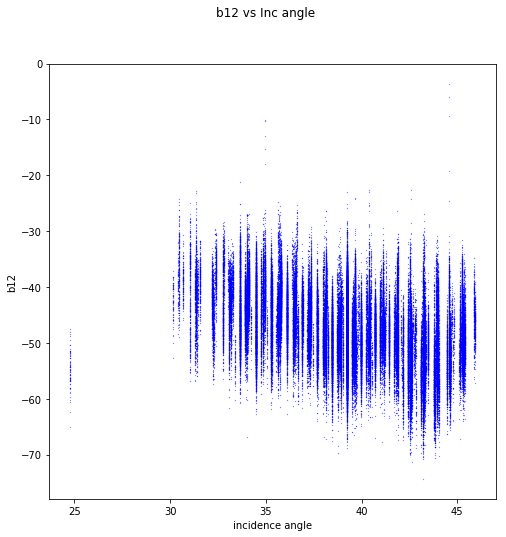

In [142]:
display_scatter_b12_vs_inc_angle(signal_vs_inc_angle_df)

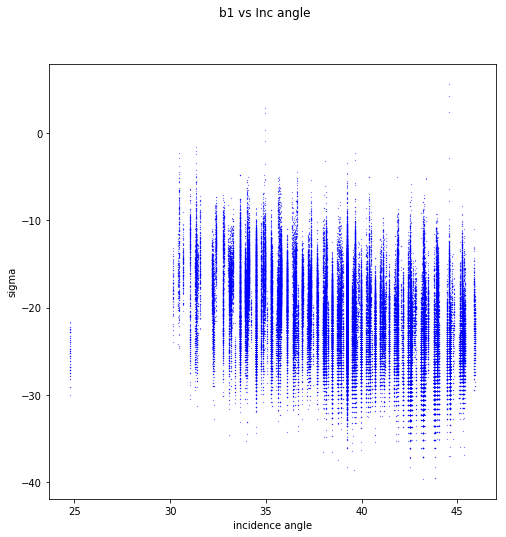

In [143]:
display_scatter_signal_vs_inc_angle(signal_vs_inc_angle_df, 'b1', range_vals=None)

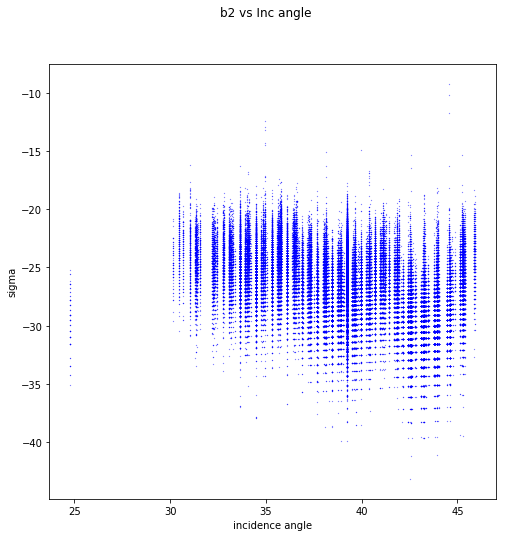

In [144]:
display_scatter_signal_vs_inc_angle(signal_vs_inc_angle_df, 'b2')

Use linear regression to find coefficients of the linear relationship `sigma(a)`

In [94]:
from sklearn.linear_model import LinearRegression

(120300, 1) (120300,)
-0.455748230884 -3.3218050865


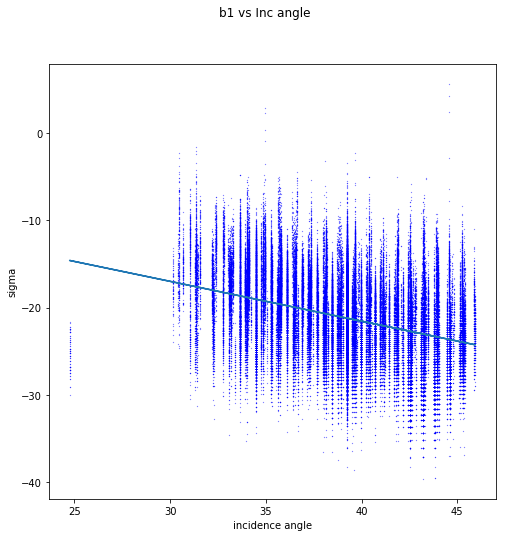

In [140]:
lr = LinearRegression()

X = []
y = []
for i in range(75):
    y.append(signal_vs_inc_angle_df['b1_%i' % i])
    X.append(signal_vs_inc_angle_df['inc_angle'])
    
X = np.concatenate(X)[:, None]
y = np.concatenate(y)

print(X.shape, y.shape)

lr.fit(X, y)

print(lr.coef_[0], lr.intercept_)

display_scatter_signal_vs_inc_angle(signal_vs_inc_angle_df, 'b1', range_vals=None)

a = signal_vs_inc_angle_df['inc_angle']
sigma_theor = lr.coef_[0] * a + lr.intercept_
plt.plot(a, sigma_theor)

(120300, 1) (120300,)
-0.280327982183 -15.6226798323


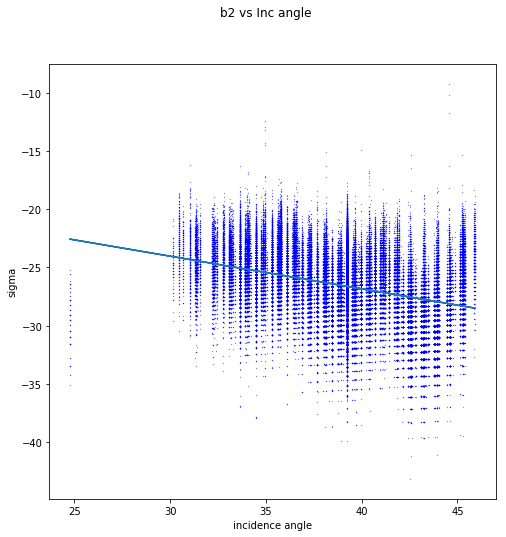

In [141]:
lr = LinearRegression()

X = []
y = []
for i in range(75):
    y.append(signal_vs_inc_angle_df['b2_%i' % i])
    X.append(signal_vs_inc_angle_df['inc_angle'])
    
X = np.concatenate(X)[:, None]
y = np.concatenate(y)

print(X.shape, y.shape)

lr.fit(X, y)

print(lr.coef_[0], lr.intercept_)

display_scatter_signal_vs_inc_angle(signal_vs_inc_angle_df, 'b2', range_vals=None)

a = signal_vs_inc_angle_df['inc_angle']
sigma_theor = lr.coef_[0] * a + lr.intercept_
plt.plot(a, sigma_theor)

Normalize signal:

$$
\sigma_{norm, 30} = \frac{\sigma_\theta + \sigma_\theta^{-1}}{2} \\
\sigma_\theta^{-1} = -a \theta + 2 a \theta_{ref} + b
$$

In [158]:
signal_vs_inc_angle_df2 = pd.DataFrame()
signal_vs_inc_angle_df2.loc[:, 'inc_angle'] = train_df['inc_angle']
signal_vs_inc_angle_df2.loc[:, 'is_iceberg'] = train_df['is_iceberg']

In [159]:
def norm_b1(x, a):
    return 0.5 * (x + (0.455748230884 * (a - 2*30) - 3.3218050865))


def norm_b2(x, a):
    return 0.5 * (x + (0.280327982183 * (a - 2*30) - 15.6226798323))

In [160]:
from functools import partial

def get_norm_line_value(b, i, f=norm_b1):
    y = 12
    return f(b[0][75 * i + y], b[1])

for i in range(75):
    signal_vs_inc_angle_df2.loc[:, "b1_%i" % i] = train_df[['band_1', 'inc_angle']].apply(partial(get_norm_line_value, i=i, f=norm_b1), axis=1)
    signal_vs_inc_angle_df2.loc[:, "b2_%i" % i] = train_df[['band_2', 'inc_angle']].apply(partial(get_norm_line_value, i=i, f=norm_b2), axis=1)    

In [161]:
signal_vs_inc_angle_df2.head()

inc_angle  is_iceberg       b1_0       b2_0       b1_1       b2_1  \
0    43.9239           0 -19.456714 -25.316852 -20.328216 -24.833805   
1    38.1562           0 -15.740932 -23.754148 -15.512304 -25.243539   
2    45.2859           1 -18.187431 -21.797906 -16.590422 -21.563094   
3    43.8306           0 -15.664975 -25.335462 -15.918033 -24.417757   
4    35.6256           0 -18.600534 -24.093716 -18.600534 -24.093716   

        b1_2       b2_2       b1_3       b2_3    ...          b1_70  \
0 -20.328216 -25.068617 -19.263663 -25.316852    ...     -20.840015   
1 -14.988423 -23.754148 -16.044788 -24.043813    ...     -13.902903   
2 -15.688657 -20.371230 -16.268576 -20.926403    ...     -14.507909   
3 -15.664975 -24.852416 -15.425853 -24.852416    ...     -16.780107   
4 -18.698166 -25.527971 -18.900201 -26.357712    ...     -20.081661   

       b2_70      b1_71      b2_71      b1_72      b2_72      b1_73  \
0 -24.834079 -19.659022 -24.611315 -20.328511 -24.399443 -20.576747   
1 -22.986186 -15.190895 -22.757557 -15.190895 -22.757557 -14.891263   
2 -20.733597 -16.268821 -22.447558 -16.819315 -22.737214 -17.316193   
3 -25.879251 -16.997300 -24.852627 -16.095534 -25.087437 -16.005985   
4 -22.811033 -20.361981 -23.125150 -21.911002 -24.094250 -20.219577   

       b2_73      b1_74      b2_74  
0 -24.004358 -18.901836 -24.004358  
1 -22.540364 -12.941525 -23.353443  
2 -22.309695 -15.341300 -22.737214  
3 -24.852627 -17.110110 -24.417970  
4 -25.528472 -20.509215 -24.674170  

[5 rows x 152 columns]

In [162]:
signal_vs_inc_angle_df.head()

inc_angle  is_iceberg       b1_0       b2_0       b1_1       b2_1  \
0    43.9239           0 -28.264969 -30.504444 -30.007973 -29.538349   
1    38.1562           0 -18.204786 -25.762188 -17.747530 -28.740969   
2    45.2859           1 -26.347132 -23.848358 -23.153114 -23.378735   
3    43.8306           0 -20.638969 -30.515509 -21.145086 -28.680099   
4    35.6256           0 -22.770674 -25.731926 -22.770674 -25.731926   

        b1_2       b2_2       b1_3       b2_3    ...          b1_70  \
0 -30.007973 -30.007973 -27.878866 -30.504444    ...     -31.031570   
1 -16.699768 -25.762188 -18.812498 -26.341518    ...     -14.528728   
2 -21.349583 -20.995007 -22.509422 -22.105352    ...     -18.988087   
3 -20.638969 -29.549416 -20.160725 -29.549416    ...     -22.869234   
4 -22.965937 -28.600435 -23.370007 -30.259918    ...     -25.732927   

       b2_70      b1_71      b2_71      b1_72      b2_72      b1_73  \
0 -29.538898 -28.669584 -29.093370 -30.008562 -28.669626 -30.505035   
1 -24.226263 -17.104712 -23.769005 -17.104712 -23.769005 -16.505447   
2 -21.719740 -22.509911 -25.147663 -23.610899 -25.726974 -24.604656   
3 -31.603086 -23.303619 -29.549839 -21.500088 -30.019459 -21.320990   
4 -23.166559 -26.293568 -23.794794 -29.391609 -25.732994 -26.008760   

       b2_73      b1_74      b2_74  
0 -27.879456 -27.155212 -27.879456  
1 -23.334620 -12.605972 -24.960777  
2 -24.871937 -20.654869 -25.726974  
3 -29.549839 -23.529240 -28.680525  
4 -28.601437 -26.588036 -26.892834  

[5 rows x 152 columns]

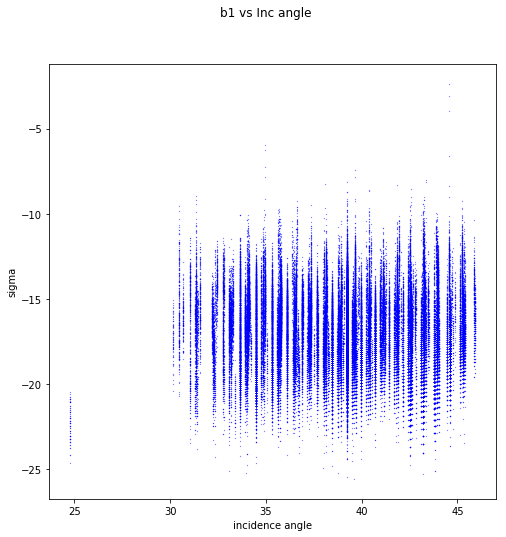

In [163]:
display_scatter_signal_vs_inc_angle(signal_vs_inc_angle_df2, 'b1')

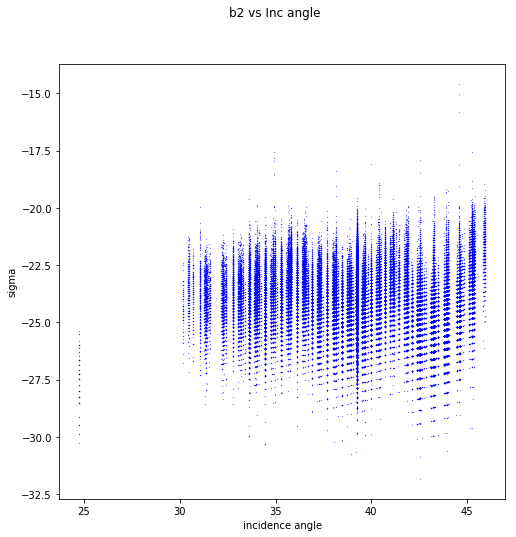

In [164]:
display_scatter_signal_vs_inc_angle(signal_vs_inc_angle_df2, 'b2')

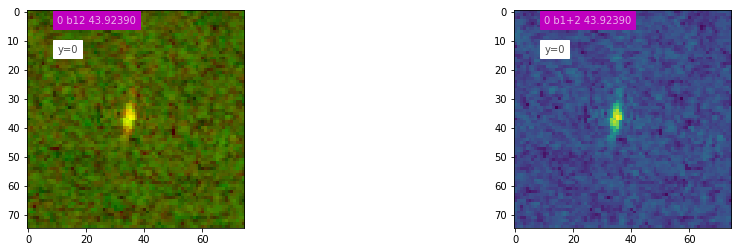

In [166]:
id_num = 0
x = get_image(id_num, train_df)
y = get_target(id_num, train_df)
inc_angle = get_inc_angle(id_num, train_df)

x[:, :, 0] = norm_b1(x[:, :, 0], a=inc_angle)
x[:, :, 1] = norm_b2(x[:, :, 1], a=inc_angle)

plt.figure(figsize=(16,4))
ax = plt.subplot(121)
display_image(ax, x, id_num, "b12", inc_angle, y)
ax = plt.subplot(122)
display_image(ax, 0.5*(x[:, :, 0] + x[:, :, 1]), id_num, "b1+2", inc_angle, y)


Min, Avg, Max signals of normalized incidence angle imagery

In [7]:
from common.dataflow import IcebergDataset
norm_b1 = IcebergDataset.norm_b1
norm_b2 = IcebergDataset.norm_b2

In [8]:
from functools import partial

def get_norm_band(b, f=norm_b1):
    return f(np.array(b[0]), b[1]).tolist()

train_df.loc[:, "nband_1"] = train_df[['band_1', 'inc_angle']].apply(partial(get_norm_band, f=norm_b1), axis=1)
train_df.loc[:, "nband_2"] = train_df[['band_2', 'inc_angle']].apply(partial(get_norm_band, f=norm_b2), axis=1)    

In [9]:
train_df.loc[:, 'min_b1'] = train_df['nband_1'].apply(np.min)
train_df.loc[:, 'avg_b1'] = train_df['nband_1'].apply(np.mean)
train_df.loc[:, 'max_b1'] = train_df['nband_1'].apply(np.max)
train_df.loc[:, 'min_b2'] = train_df['nband_2'].apply(np.min)
train_df.loc[:, 'avg_b2'] = train_df['nband_2'].apply(np.mean)
train_df.loc[:, 'max_b2'] = train_df['nband_2'].apply(np.max)

train_df.loc[:, '10p_b1'] = train_df['nband_1'].apply(lambda x: np.percentile(x, q=10.0))
train_df.loc[:, '10p_b2'] = train_df['nband_2'].apply(lambda x: np.percentile(x, q=10.0))

In [10]:
train_df.head()

band_1  \
0  [-27.878360999999998, -27.15416, -28.668615, -...   
1  [-12.242375, -14.920304999999999, -14.920363, ...   
2  [-24.603676, -24.603714, -24.871029, -23.15277...   
3  [-22.454607, -23.082819, -23.998013, -23.99805...   
4  [-26.006956, -23.164886, -23.164886, -26.89116...   

                                              band_2        id  inc_angle  \
0  [-27.154118, -29.537888, -31.0306, -32.190483,...  dfd5f913    43.9239   
1  [-31.506321, -27.984554, -26.645678, -23.76760...  e25388fd    38.1562   
2  [-24.870956, -24.092632, -20.653963, -19.41104...  58b2aaa0    45.2859   
3  [-27.889421, -27.519794, -27.165262, -29.10350...  4cfc3a18    43.8306   
4  [-27.206915, -30.259186, -30.259186, -23.16495...  271f93f4    35.6256   

   is_iceberg                                            nband_1  \
0           0  [-19.263410110507134, -18.901309610507134, -19...   
1           0  [-12.75972664614196, -14.098691646141958, -14....   
2           1  [-17.315703065275134, -17.315722065275132, -17...   
3           0  [-16.572793765477876, -16.886899765477878, -17...   
4           0  [-20.218675382679486, -18.797640382679486, -18...   

                                             nband_2     min_b1     avg_b1  \
0  [-23.64168925333606, -24.83357425333606, -25.5... -24.429918 -19.279751   
1  [-26.62621460475451, -24.865331104754507, -24.... -18.201194 -13.421816   
2  [-22.309204897469442, -21.92004289746944, -20.... -21.709464 -16.540714   
3  [-24.0224180537049, -23.8376045537049, -23.660... -21.447558 -16.950876   
4  [-24.831210600610657, -26.357346100610656, -26... -24.720441 -19.855212   

      max_b1     min_b2     avg_b2     max_b2     10p_b1     10p_b2  
0  -5.430804 -30.632589 -25.019689 -15.690707 -20.840226 -26.482594  
1  -0.353335 -28.255970 -23.552607 -10.851028 -15.039973 -25.052226  
2  -9.973104 -26.948136 -22.293637 -17.676666 -17.878458 -23.743739  
3  -2.947677 -29.859734 -24.861664 -12.854966 -18.285203 -26.179874  
4 -10.693215 -31.365811 -24.041616 -15.944756 -21.330989 -25.528961

Display min, avg, max values

In [11]:
def display_min_avg_max(df, title):
    plt.figure(figsize=(18, 4))
    samples = list(range(df.shape[0]))
    plt.subplot(121)
    plt.title(title)
    plt.scatter(df['min_b1'], samples, c='b', label='mins', marker='.', s=0.75)
    plt.scatter(df['10p_b1'], samples, c='y', label='10%', marker='.', s=0.75)    
    plt.scatter(df['max_b1'], samples, c='r', label='maxs', marker='.', s=0.75)
    plt.scatter(df['avg_b1'], samples, c='g', label='mean', marker='.', s=0.75)
    plt.xlim([-30, 20])
    plt.xlabel("min/10%/avg/max values")
    plt.subplot(122)
    plt.scatter(df['min_b2'], samples, c='b', label='mins', marker='.', s=0.75)
    plt.scatter(df['10p_b2'], samples, c='y', label='10%', marker='.', s=0.75)    
    plt.scatter(df['max_b2'], samples, c='r', label='maxs', marker='.', s=0.75)
    plt.scatter(df['avg_b2'], samples, c='g', label='mean', marker='.', s=0.75)
    plt.xlim([-35, 5])
    plt.xlabel("min/10%/avg/max values")

In [12]:
train_ships_df = train_df[train_df['is_iceberg'] == 0]
train_icebergs_df = train_df[train_df['is_iceberg'] == 1]

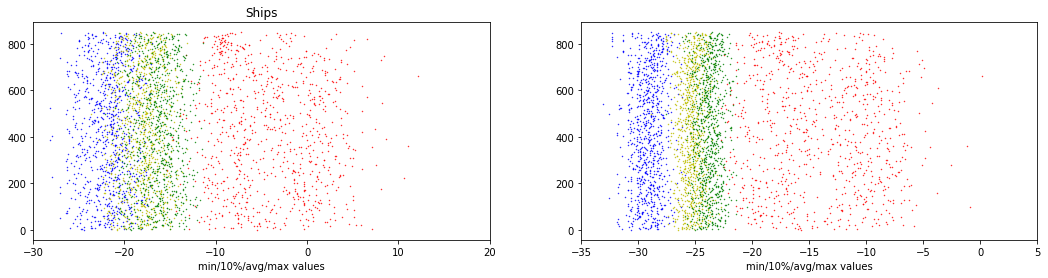

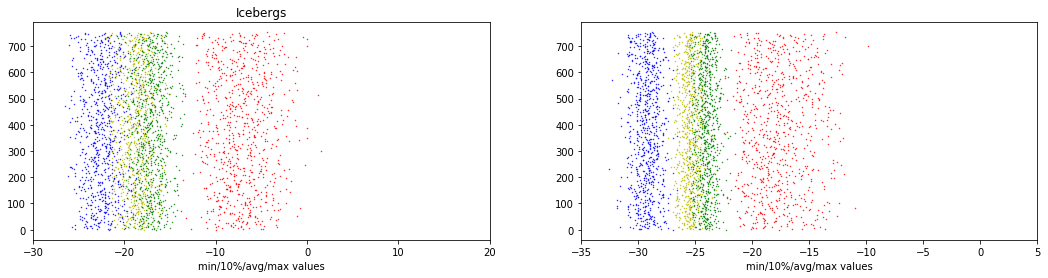

In [13]:
display_min_avg_max(train_ships_df, "Ships")
display_min_avg_max(train_icebergs_df, "Icebergs")

(-35, 5)

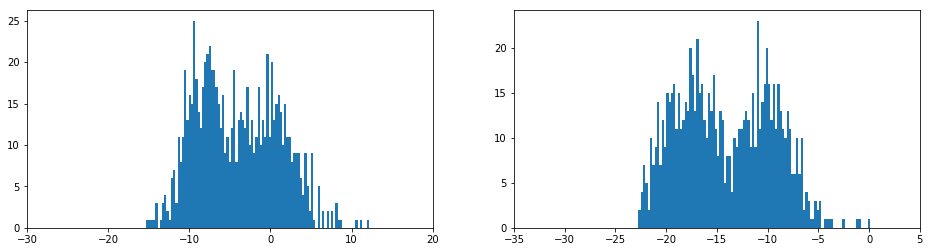

In [85]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
_ = plt.hist(train_ships_df['max_b1'], bins=100)
plt.xlim([-30, 20])
plt.subplot(122)
_ = plt.hist(train_ships_df['max_b2'], bins=100)
plt.xlim([-35, 5])

(-35, 5)

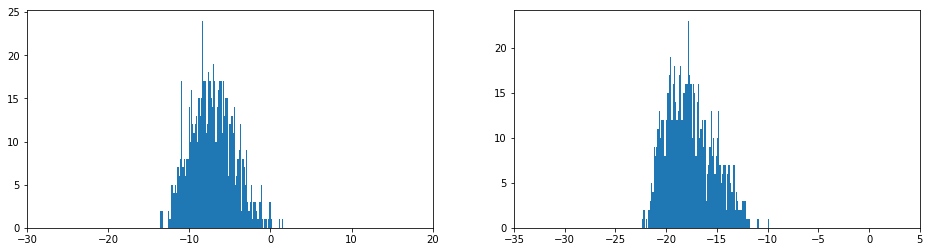

In [86]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
_ = plt.hist(train_icebergs_df['max_b1'], bins=100)
plt.xlim([-30, 20])
plt.subplot(122)
_ = plt.hist(train_icebergs_df['max_b2'], bins=100)
plt.xlim([-35, 5])

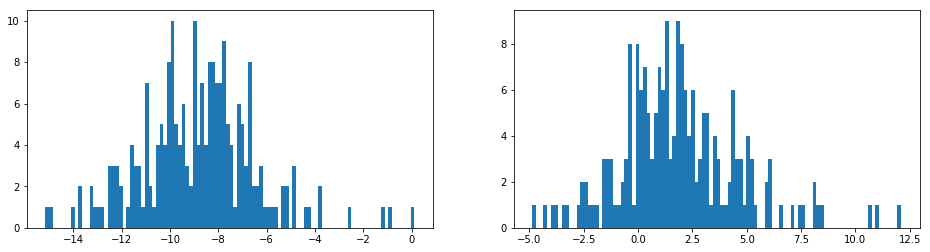

In [84]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
_ = plt.hist(train_ships_df[train_ships_df['max_b1'] > 0.0]['max_b2'], bins=100)
plt.subplot(122)
_ = plt.hist(train_ships_df[train_ships_df['max_b2'] > -10.0]['max_b1'], bins=100)

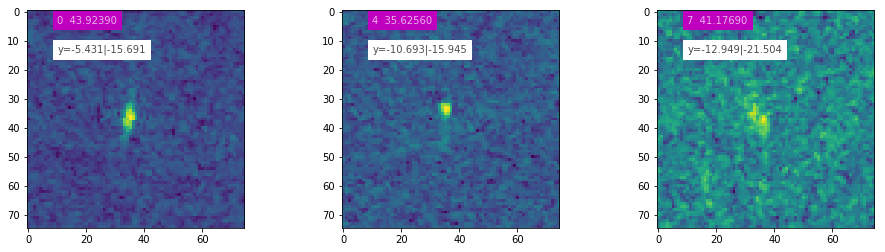

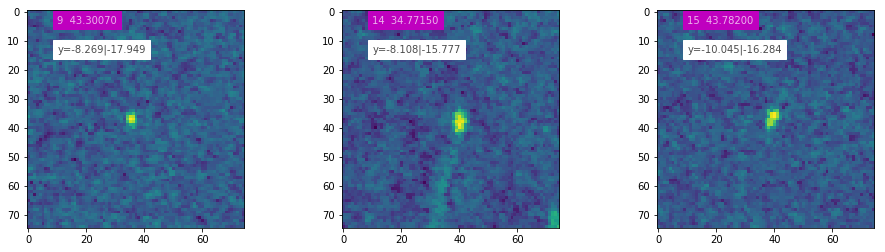

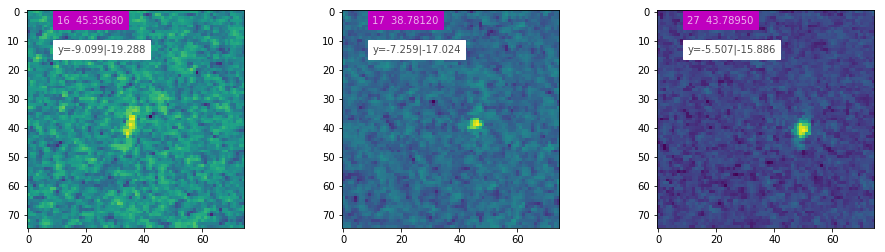

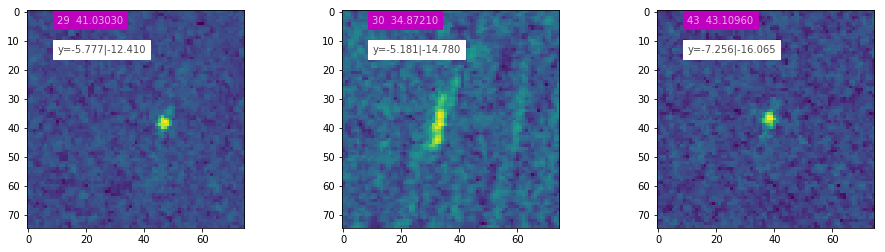

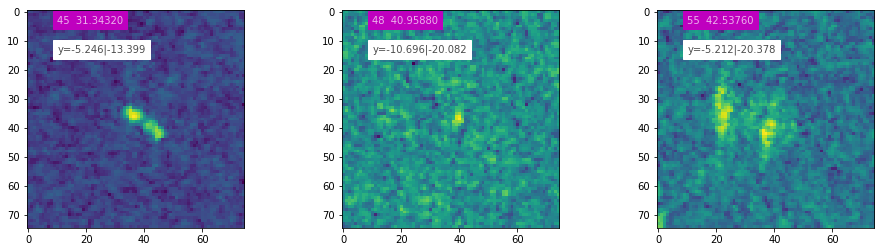

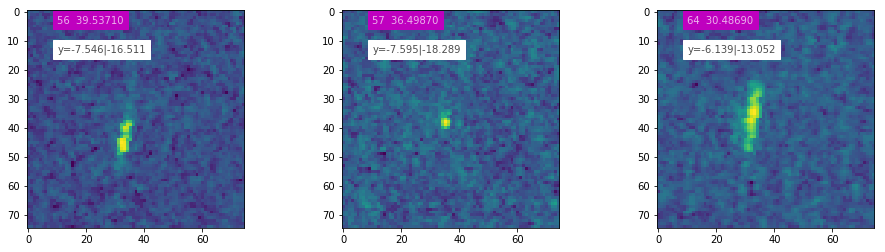

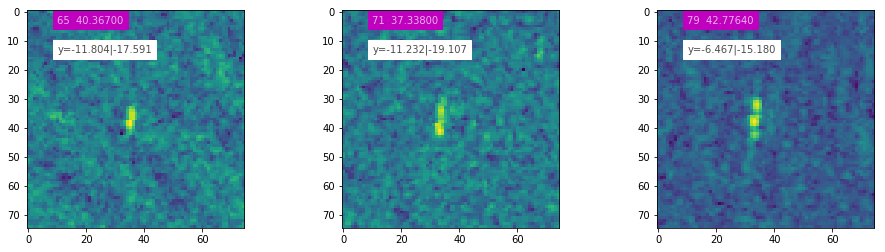

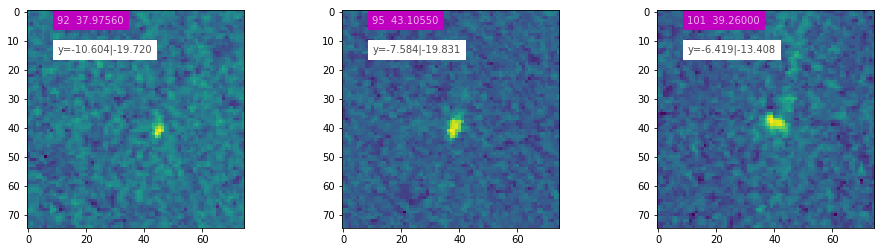

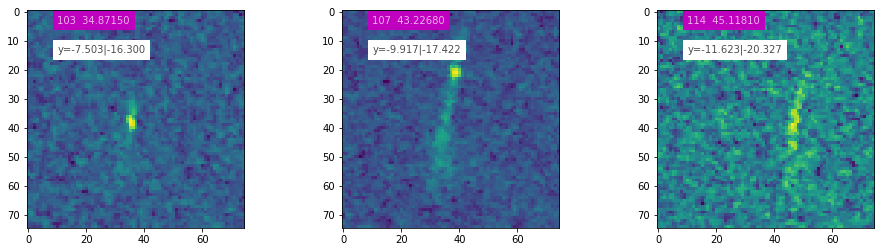

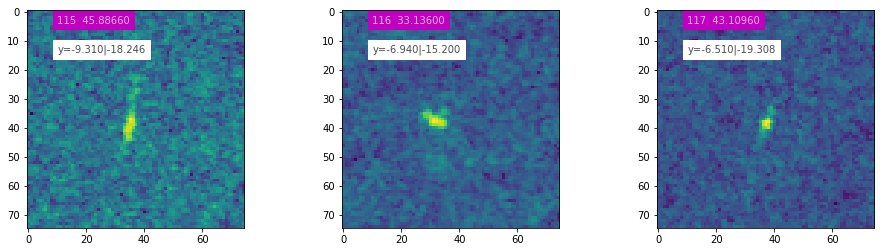

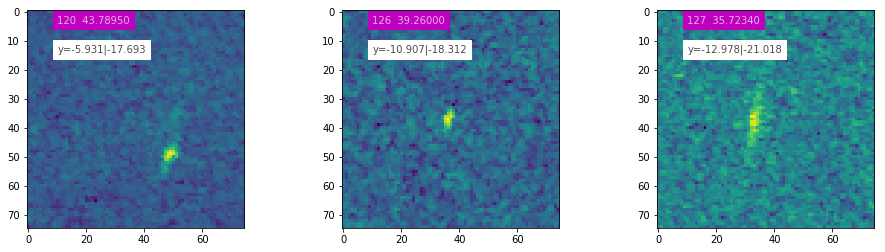

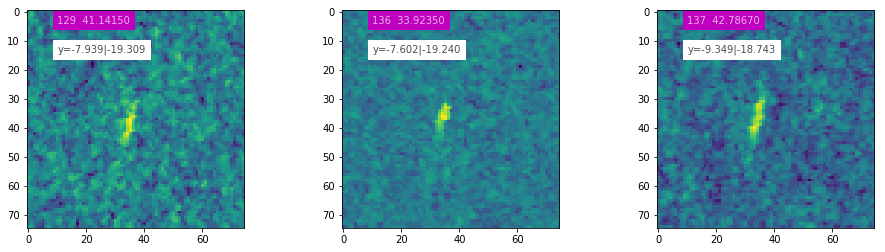

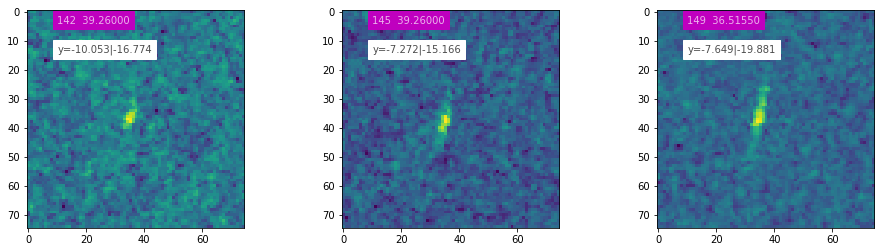

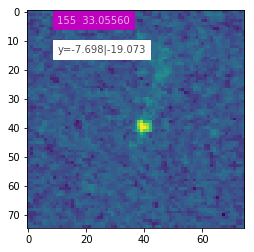

In [88]:
n_cols = 3

indices = train_ships_df[(train_ships_df['max_b1'] < -5.0)].index

for i, index in enumerate(indices[:40]):
    
    if i % n_cols == 0:
        plt.figure(figsize=(16, 4))
        
    x = get_image(index, train_ships_df)
    inc_angle = get_inc_angle(index, train_ships_df)
    max_b1 = train_ships_df.loc[index, 'max_b1']
    max_b2 = train_ships_df.loc[index, 'max_b2']
    
    ax = plt.subplot(1, n_cols, i % n_cols + 1)
    display_image(ax, x[:, :, 0] + x[:, :, 1], index, "", inc_angle, "{0:.3f}|{1:.3f}".format(max_b1, max_b2))

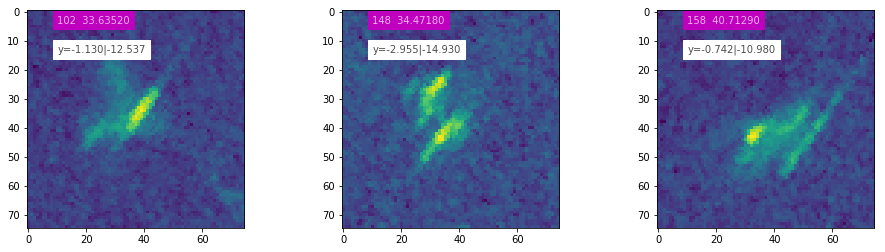

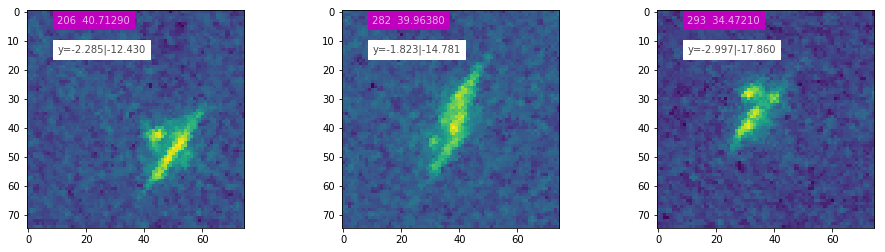

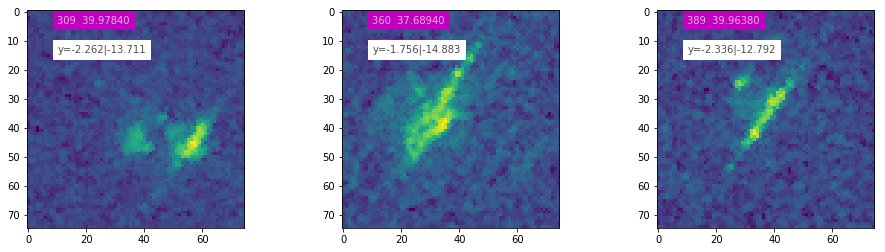

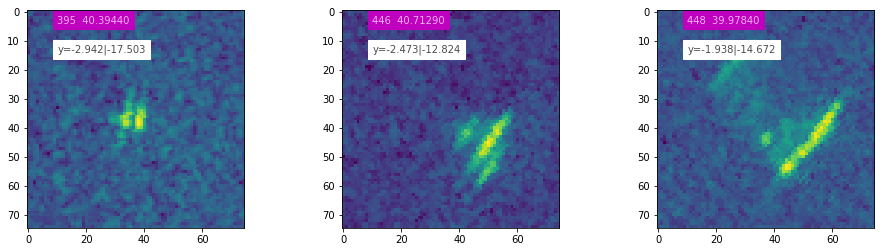

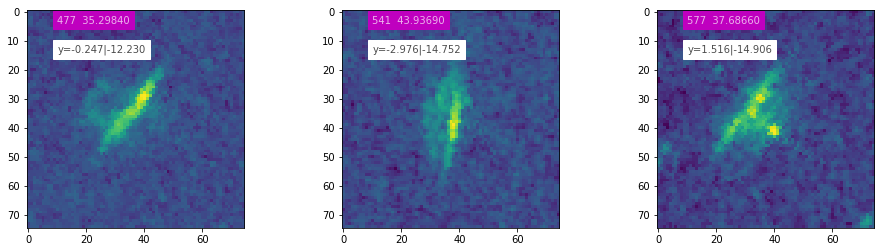

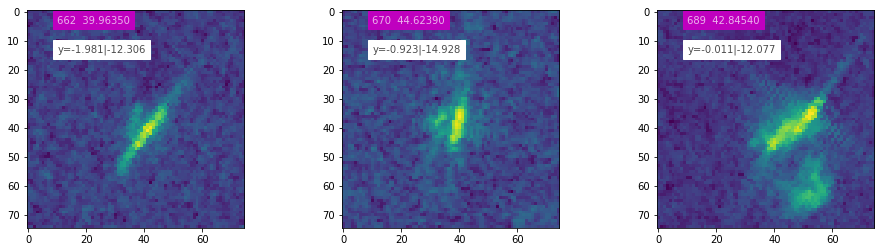

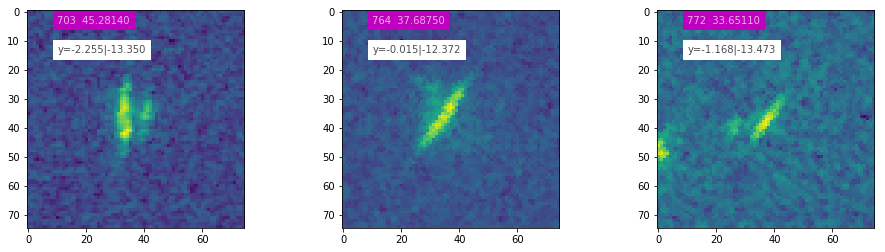

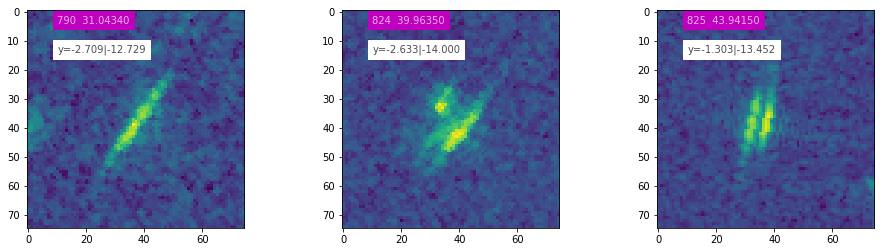

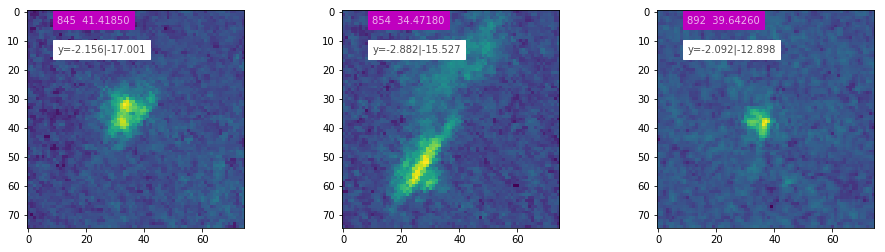

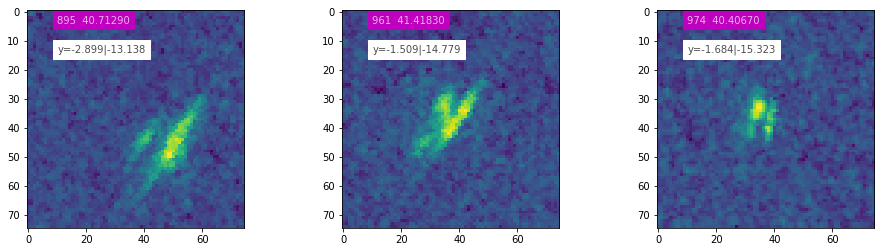

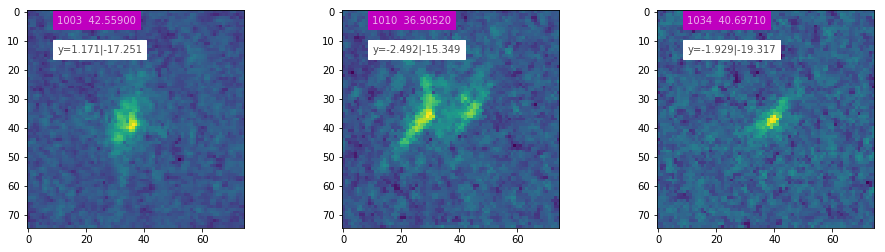

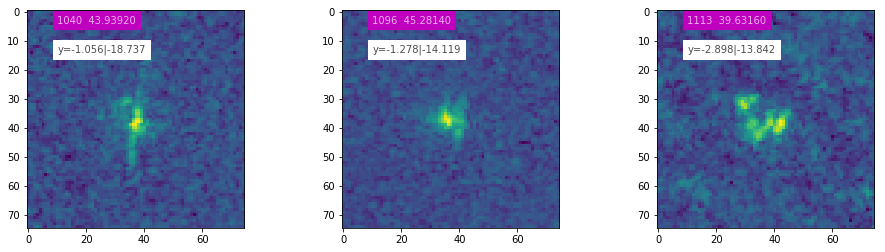

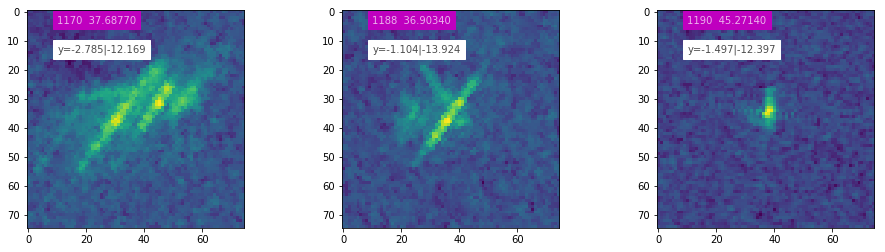

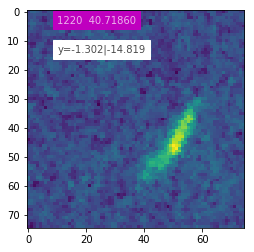

In [79]:
n_cols = 3

indices = train_icebergs_df[(train_icebergs_df['max_b1'] > -3.0)].index

for i, index in enumerate(indices[:40]):
    
    if i % n_cols == 0:
        plt.figure(figsize=(16, 4))
        
    x = get_image(index, train_icebergs_df)
    inc_angle = get_inc_angle(index, train_icebergs_df)
    max_b1 = train_icebergs_df.loc[index, 'max_b1']
    max_b2 = train_icebergs_df.loc[index, 'max_b2']
    
    ax = plt.subplot(1, n_cols, i % n_cols + 1)
    display_image(ax, x[:, :, 0] + x[:, :, 1], index, "", inc_angle, "{0:.3f}|{1:.3f}".format(max_b1, max_b2))

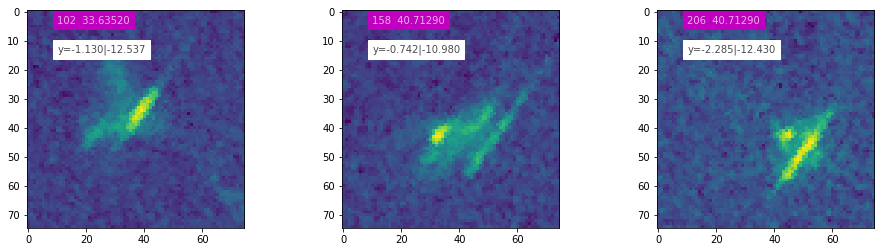

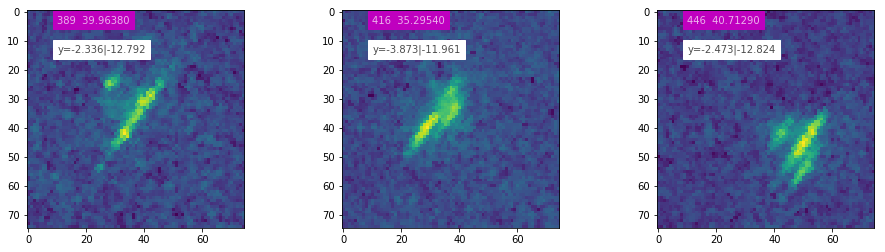

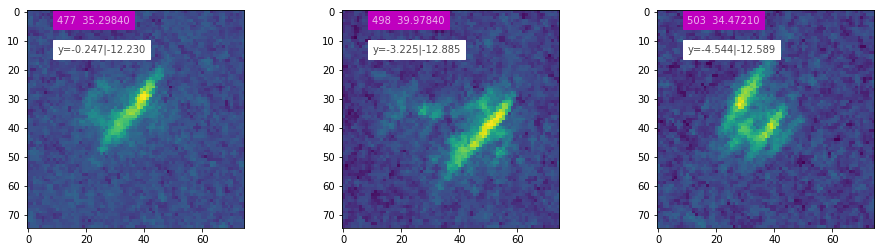

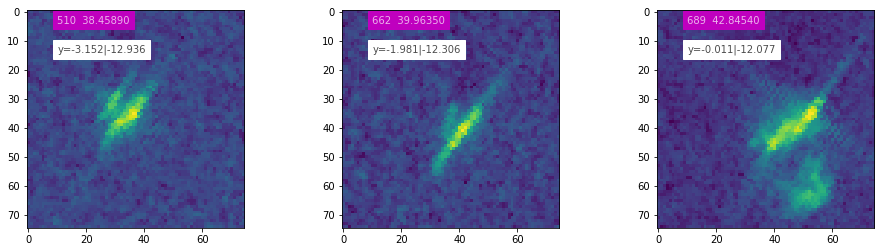

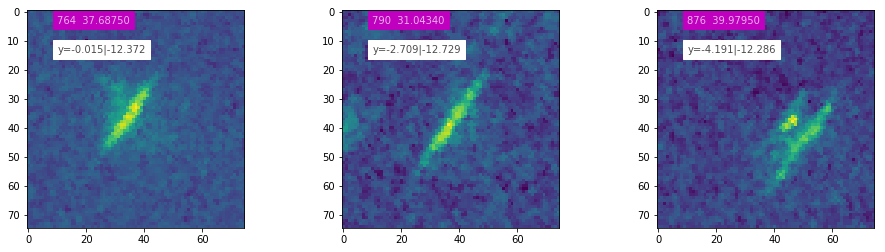

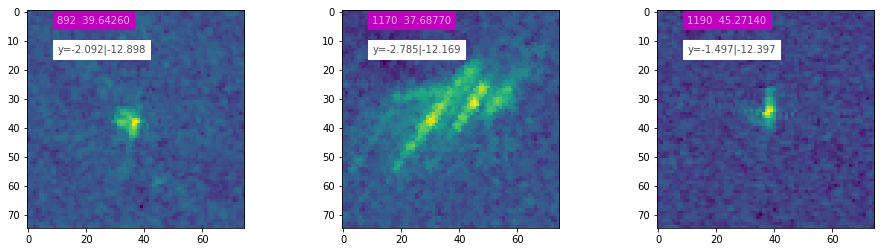

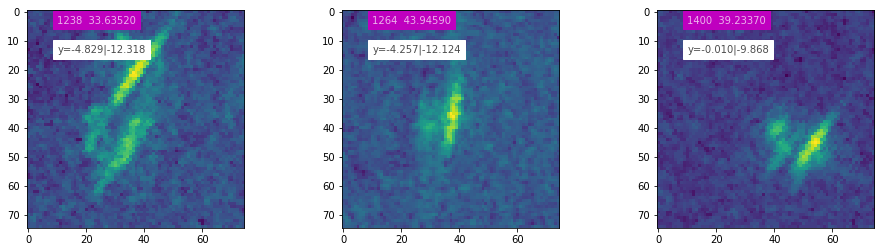

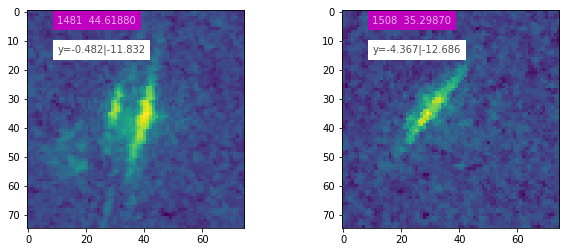

In [80]:
n_cols = 3

indices = train_icebergs_df[(train_icebergs_df['max_b2'] > -13.0)].index

for i, index in enumerate(indices[:40]):
    
    if i % n_cols == 0:
        plt.figure(figsize=(16, 4))
        
    x = get_image(index, train_icebergs_df)
    inc_angle = get_inc_angle(index, train_icebergs_df)
    max_b1 = train_icebergs_df.loc[index, 'max_b1']
    max_b2 = train_icebergs_df.loc[index, 'max_b2']
    
    ax = plt.subplot(1, n_cols, i % n_cols + 1)
    display_image(ax, x[:, :, 0] + x[:, :, 1], index, "", inc_angle, "{0:.3f}|{1:.3f}".format(max_b1, max_b2))

Correlation between incidence angle and min, average of the signal

In [37]:
def display_scatter_signal_vs_inc_angle(df):
    plt.figure(figsize=(16, 4))
    plt.suptitle("b1 min, 10%, mean, max vs Inc angle")
    plt.subplot(141)
    plt.scatter(df['min_b1'], df['inc_angle'], c='b', s=0.1, marker='.')
    plt.subplot(142)
    plt.scatter(df['10p_b1'], df['inc_angle'], c='b', s=0.1, marker='.')
    plt.subplot(143)
    plt.scatter(df['avg_b1'], df['inc_angle'], c='b', s=0.1, marker='.')
    plt.subplot(144)
    plt.scatter(df['max_b1'], df['inc_angle'], c='b', s=0.1, marker='.')

    plt.figure(figsize=(16, 4))
    plt.suptitle("b2 min, 10%, mean, max vs Inc angle")
    plt.subplot(141)
    plt.scatter(df['min_b2'], df['inc_angle'], c='b', s=0.1, marker='.')
    plt.subplot(142)
    plt.scatter(df['10p_b2'], df['inc_angle'], c='b', s=0.1, marker='.')
    plt.subplot(143)
    plt.scatter(df['avg_b2'], df['inc_angle'], c='b', s=0.1, marker='.')
    plt.subplot(144)
    plt.scatter(df['max_b2'], df['inc_angle'], c='b', s=0.1, marker='.')

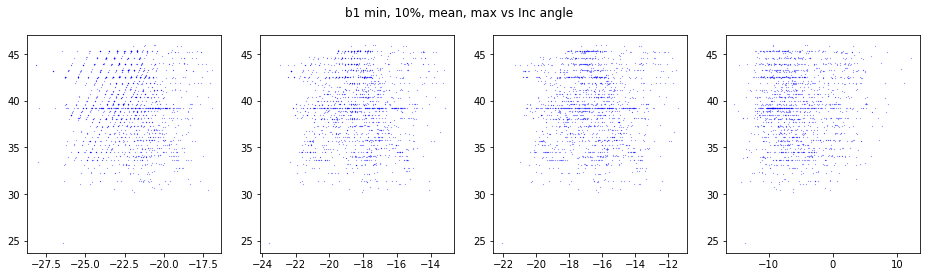

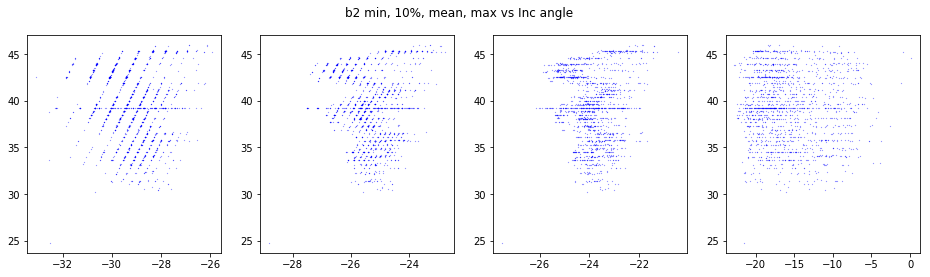

In [38]:
display_scatter_signal_vs_inc_angle(train_df)

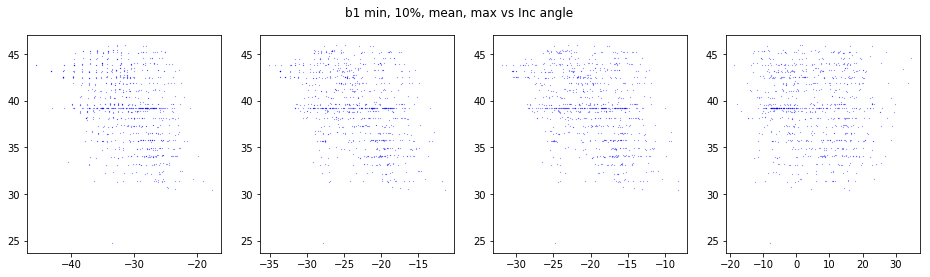

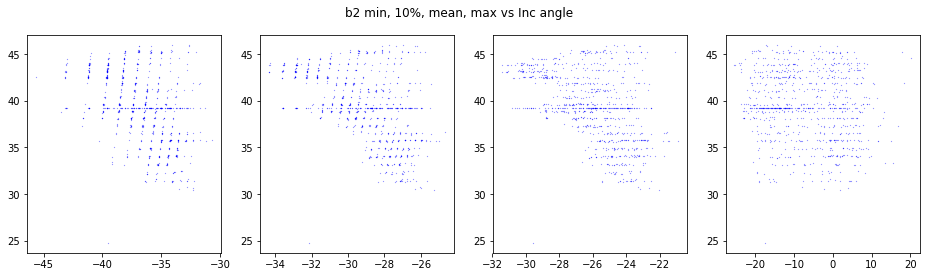

In [50]:
display_scatter_signal_vs_inc_angle(train_ships_df)

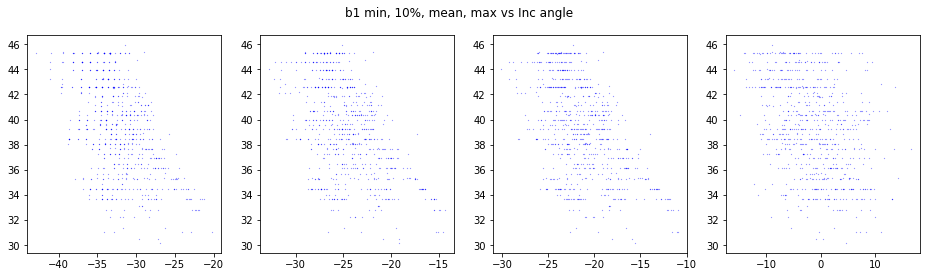

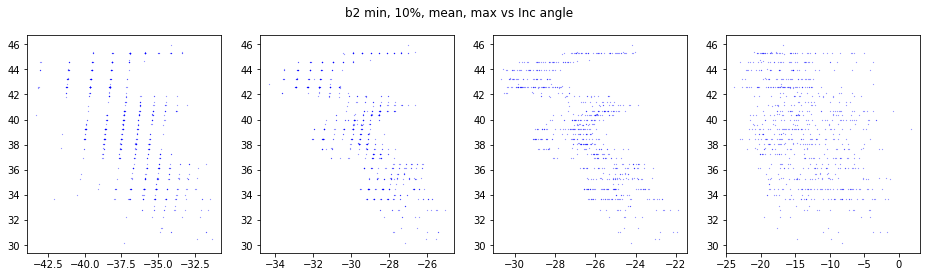

In [51]:
display_scatter_signal_vs_inc_angle(train_icebergs_df)

In [13]:
def norm_factor(a, ref_a=30.0):
    return 2.0 * np.log(np.cos(ref_a * np.pi / 180.0)) - 2.0 * np.log(np.cos(a * np.pi / 180.0))

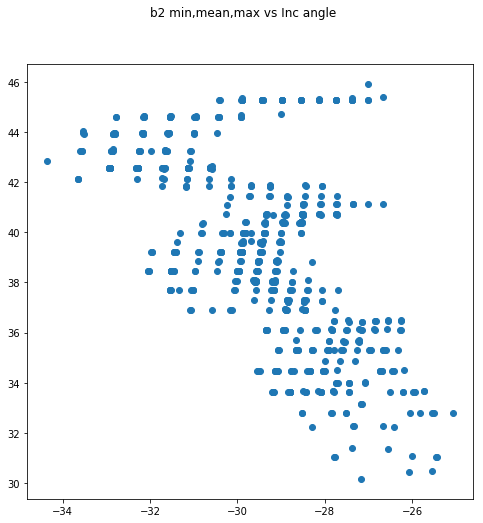

In [127]:
# plt.figure(figsize=(12, 4))
# plt.suptitle("b1 min,mean,max vs Inc angle")
# plt.subplot(131)
# plt.scatter(train_icebergs_df['min_b1'], train_icebergs_df['inc_angle'])
# plt.subplot(132)
# plt.scatter(train_df['avg_b1'], train_df['inc_angle'])
# plt.subplot(133)
# plt.scatter(train_df['max_b1'], train_df['inc_angle'])


plt.figure(figsize=(8, 8))
plt.suptitle("b2 min,mean,max vs Inc angle")
# plt.subplot(131)
plt.scatter(train_icebergs_df['10p_b2'], train_icebergs_df['inc_angle'])
# plt.xlim([-50, -30])
# plt.subplot(132)
# plt.scatter(train_df['avg_b2'] - 0.08 * train_df['inc_angle'], train_df['inc_angle'])
# plt.subplot(133)
# plt.scatter(train_df['max_b2'] - 0.08 * train_df['inc_angle'], train_df['inc_angle'])

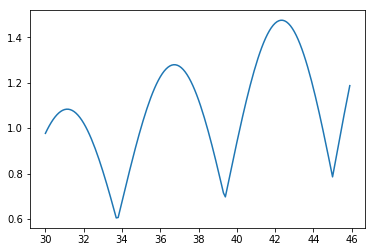

In [125]:
x = np.arange(30, 46, 0.1)
w = 32
ph = -2.0 * np.pi/4.0

def f00(x):
    x = x * 2.0 * np.pi / 360.0
    f = np.abs(np.cos(x * w + ph)) * x + x   
    return f

y = f00(x)
plt.plot(x, y)

In [114]:
def f001(s, a):
    s0 = f00(a)
    return s - s0

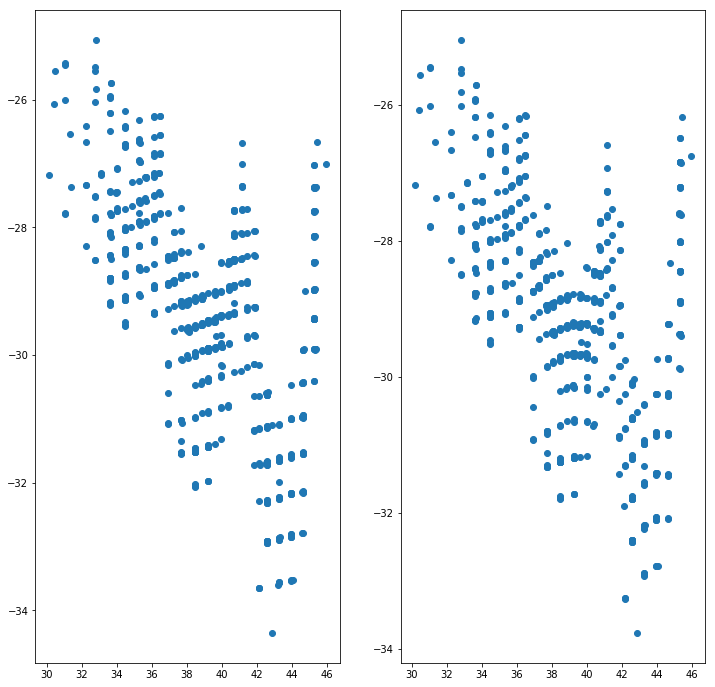

In [117]:
plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.scatter(train_icebergs_df['inc_angle'], train_icebergs_df['10p_b2'])
plt.subplot(122)
plt.scatter(train_icebergs_df['inc_angle'], f001(train_icebergs_df['10p_b2'], train_icebergs_df['inc_angle']))

In [54]:
# min_ranges = (-42.2, -41.0)
# min_ranges = (-41.0, -39.5)
# min_ranges = (-39.0, -38.2)
min_ranges = (-33.3, -32.5)

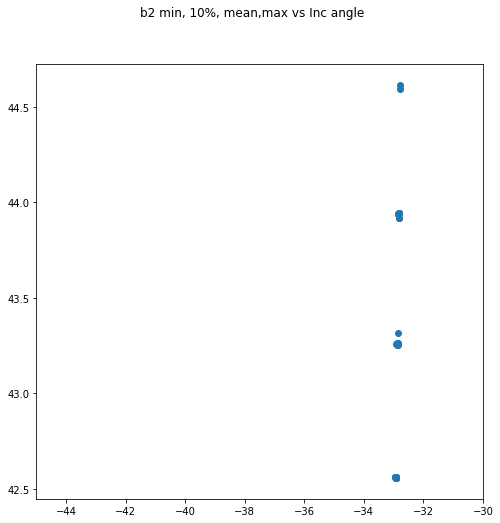

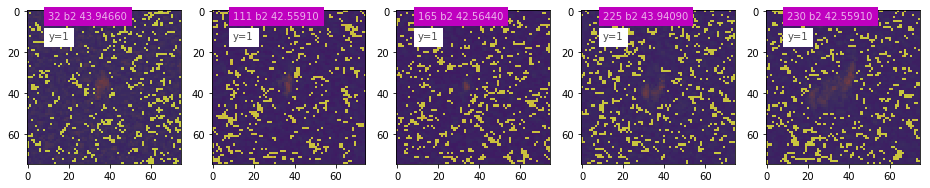

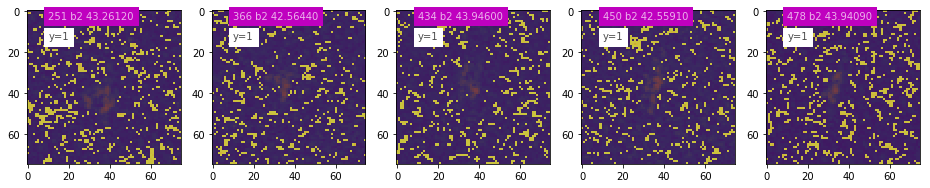

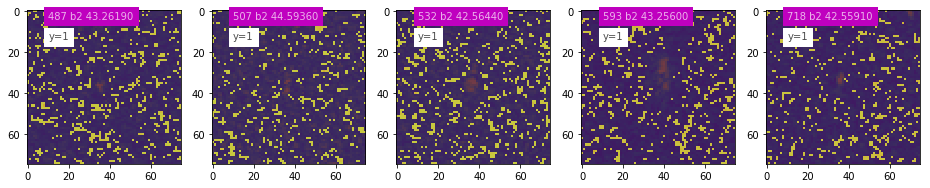

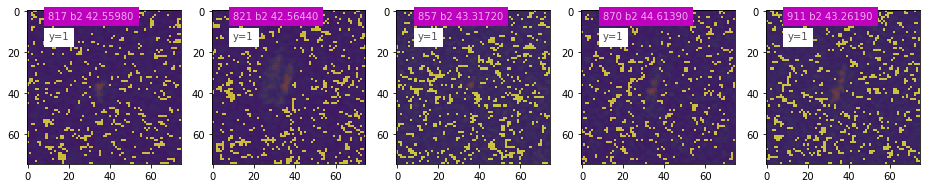

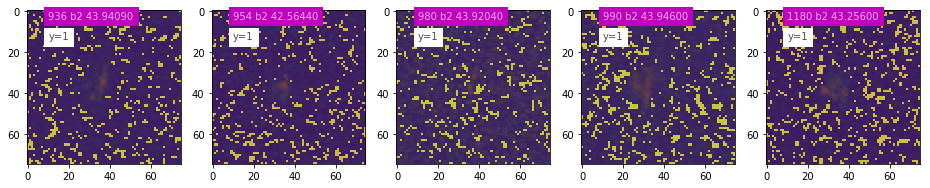

In [56]:
df = train_icebergs_df[(train_icebergs_df['10p_b2'] < min_ranges[1]) & (train_icebergs_df['10p_b2'] > min_ranges[0])]

plt.figure(figsize=(8, 8))
plt.suptitle("b2 min, 10%, mean,max vs Inc angle")
plt.scatter(df['10p_b2'], df['inc_angle'])
plt.xlim([-45, -30])

n_cols = 5
for i, index in enumerate(df.index[:25]):
    
    if i % n_cols == 0:
        plt.figure(figsize=(16, 4))
        
    x = get_image(index, df)
    inc_angle = get_inc_angle(index, df)
    y = get_target(index, df)

    ax = plt.subplot(1, n_cols, i % n_cols + 1)
    display_image(ax, x[:, :, 1], index, 'b2', inc_angle, y)
    display_image(ax, x[:, :, 1] < min_ranges[1], index, 'b2', inc_angle, y, alpha=0.75)

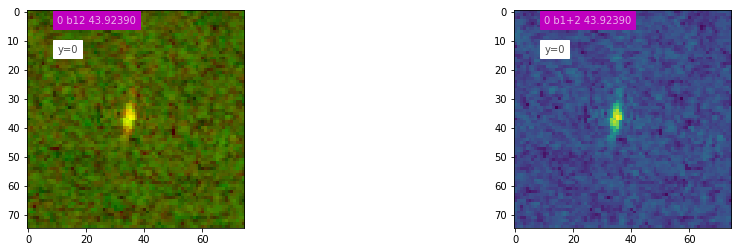

In [23]:
id_num = 0
x = get_image(id_num, train_df)
y = get_target(id_num, train_df)
inc_angle = get_inc_angle(id_num, train_df)

x -= inc_angle * 0.095

plt.figure(figsize=(16,4))
ax = plt.subplot(121)
display_image(ax, x, id_num, "b12", inc_angle, y)
ax = plt.subplot(122)
display_image(ax, 0.5*(x[:, :, 0] + x[:, :, 1]), id_num, "b1+2", inc_angle, y)


In [66]:
train_ships_df = train_df[train_df['is_iceberg'] == 0]
train_icebergs_df = train_df[train_df['is_iceberg'] == 1]

def compute_min_max_mean(df, w_max=None, h_max=None):
    min_vals = [] 
    max_vals = []
    mean_vals = []
    indices = df.index
    for i in indices:
        x = get_image(i, df)
        a = get_inc_angle(i, df)
        x -= a * 0.095
        h, w, c = x.shape
        w_max = w if w_max is None else w_max
        h_max = h if h_max is None else h_max
        min_vals.append((x[:h_max, :w_max, 0].min(), x[:h_max, :w_max, 1].min()))
        max_vals.append((x[:h_max, :w_max, 0].max(), x[:h_max, :w_max, 1].max()))
        mean_vals.append((x[:h_max, :w_max, 0].mean(), x[:h_max, :w_max, 1].mean()))

    min_vals = np.array(min_vals)
    max_vals = np.array(max_vals)
    mean_vals = np.array(mean_vals)
    return min_vals, max_vals, mean_vals

train_ships_min_vals, train_ships_max_vals, train_ships_mean_vals = compute_min_max_mean(train_ships_df)
train_icebergs_min_vals, train_icebergs_max_vals, train_icebergs_mean_vals = compute_min_max_mean(train_icebergs_df)
train_sea_min_vals, train_sea_max_vals, train_sea_mean_vals = compute_min_max_mean(train_df, w_max=25, h_max=25)

Text(0,0.5,'samples with sea')

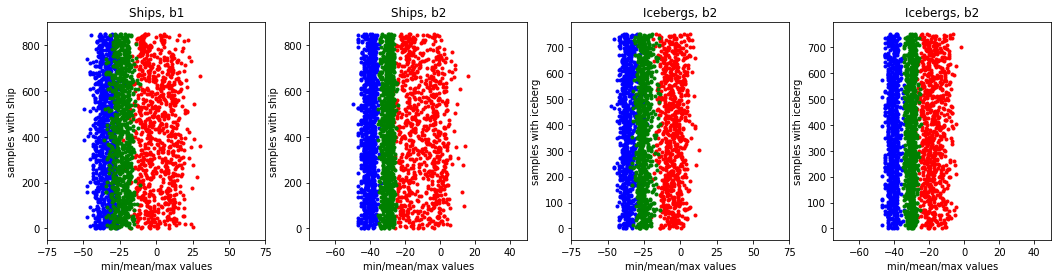

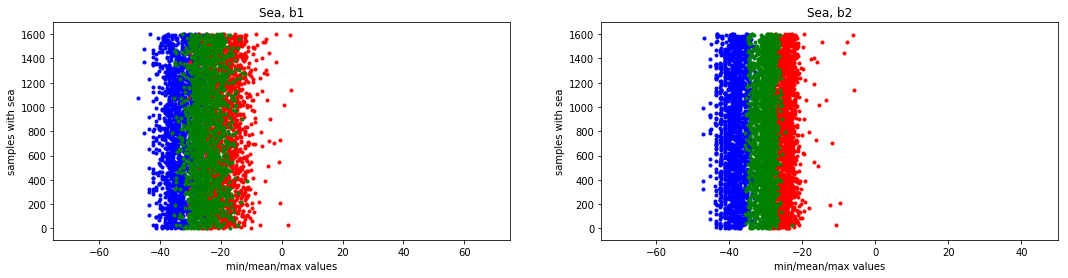

In [67]:
plt.figure(figsize=(18, 4))
samples = list(range(train_ships_min_vals.shape[0]))
plt.subplot(141)
plt.title("Ships, b1")
plt.scatter(train_ships_min_vals[:, 0], samples, c='b', label='mins', marker='.')
plt.scatter(train_ships_max_vals[:, 0], samples, c='r', label='maxs', marker='.')
plt.scatter(train_ships_mean_vals[:, 0], samples, c='g', label='mean', marker='.')
plt.xlim([-75, 75])
plt.xlabel("min/mean/max values")
plt.ylabel("samples with ship")
plt.subplot(142)
plt.title("Ships, b2")
plt.scatter(train_ships_min_vals[:, 1], samples, c='b', label='mins', marker='.')
plt.scatter(train_ships_max_vals[:, 1], samples, c='r', label='maxs', marker='.')
plt.scatter(train_ships_mean_vals[:, 1], samples, c='g', label='mean', marker='.')
plt.xlim([-75, 50])
plt.xlabel("min/mean/max values")
plt.ylabel("samples with ship")

samples = list(range(train_icebergs_min_vals.shape[0]))
plt.subplot(143)
plt.title("Icebergs, b2")
plt.scatter(train_icebergs_min_vals[:, 0], samples, c='b', label='mins', marker='.')
plt.scatter(train_icebergs_max_vals[:, 0], samples, c='r', label='maxs', marker='.')
plt.scatter(train_icebergs_mean_vals[:, 0], samples, c='g', label='mean', marker='.')
plt.xlim([-75, 75])
plt.xlabel("min/mean/max values")
plt.ylabel("samples with iceberg")

plt.subplot(144)
plt.title("Icebergs, b2")
plt.scatter(train_icebergs_min_vals[:, 1], samples, c='b', label='mins', marker='.')
plt.scatter(train_icebergs_max_vals[:, 1], samples, c='r', label='maxs', marker='.')
plt.scatter(train_icebergs_mean_vals[:, 1], samples, c='g', label='mean', marker='.')
plt.xlim([-75, 50])
plt.xlabel("min/mean/max values")
plt.ylabel("samples with iceberg")


samples = list(range(train_sea_min_vals.shape[0]))
plt.figure(figsize=(18, 4))
plt.subplot(121)
plt.title("Sea, b1")
plt.scatter(train_sea_min_vals[:, 0], samples, c='b', label='mins', marker='.')
plt.scatter(train_sea_max_vals[:, 0], samples, c='r', label='maxs', marker='.')
plt.scatter(train_sea_mean_vals[:, 0], samples, c='g', label='mean', marker='.')
plt.xlim([-75, 75])
plt.xlabel("min/mean/max values")
plt.ylabel("samples with sea")
plt.subplot(122)
plt.title("Sea, b2")
plt.scatter(train_sea_min_vals[:, 1], samples, c='b', label='mins', marker='.')
plt.scatter(train_sea_max_vals[:, 1], samples, c='r', label='maxs', marker='.')
plt.scatter(train_sea_mean_vals[:, 1], samples, c='g', label='mean', marker='.')
plt.xlim([-75, 50])
plt.xlabel("min/mean/max values")
plt.ylabel("samples with sea")

In [68]:
train_df.columns

Index(['band_1', 'band_2', 'id', 'inc_angle', 'is_iceberg', 'min_b1', 'avg_b1',
       'max_b1', 'min_b2', 'avg_b2', 'max_b2'],
      dtype='object')

In [71]:
train_df_fix_a = train_df[(train_df['inc_angle'] < 35.5) & (train_df['inc_angle'] >= 35)]
train_ships_df_fix_a = train_df_fix_a[train_df_fix_a['is_iceberg'] == 0]
train_icebergs_df_fix_a = train_df_fix_a[train_df_fix_a['is_iceberg'] == 1]


def compute_min_max_mean(df, w_max=None, h_max=None):
    min_vals = [] 
    max_vals = []
    mean_vals = []
    indices = df.index
    for i in indices:
        x = get_image(i, df)
        a = get_inc_angle(i, df)
#         x *= norm_factor(a)
        x -= a * 0.095
        
        h, w, c = x.shape
        w_max = w if w_max is None else w_max
        h_max = h if h_max is None else h_max
        min_vals.append((x[:h_max, :w_max, 0].min(), x[:h_max, :w_max, 1].min()))
        max_vals.append((x[:h_max, :w_max, 0].max(), x[:h_max, :w_max, 1].max()))
        mean_vals.append((x[:h_max, :w_max, 0].mean(), x[:h_max, :w_max, 1].mean()))

    min_vals = np.array(min_vals)
    max_vals = np.array(max_vals)
    mean_vals = np.array(mean_vals)
    return min_vals, max_vals, mean_vals

train_ships_fix_a_min_vals, train_ships_fix_a_max_vals, train_ships_fix_a_mean_vals = compute_min_max_mean(train_ships_df_fix_a)
train_icebergs_fix_a_min_vals, train_icebergs_fix_a_max_vals, train_icebergs_fix_a_mean_vals = compute_min_max_mean(train_icebergs_df_fix_a)
train_sea_fix_a_min_vals, train_sea_fix_a_max_vals, train_sea_fix_a_mean_vals = compute_min_max_mean(train_df_fix_a, w_max=25, h_max=25)

Text(0,0.5,'samples with sea')

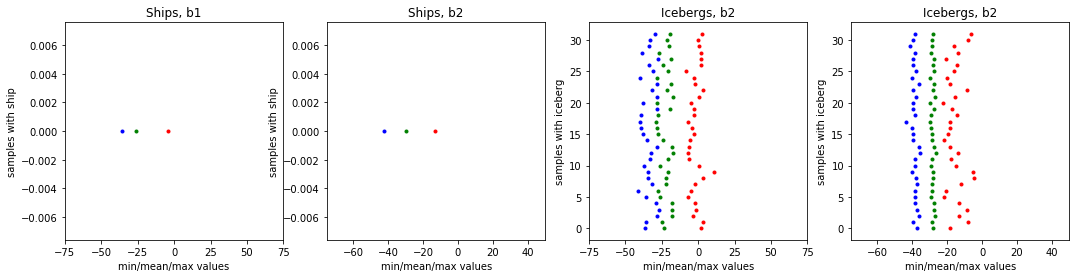

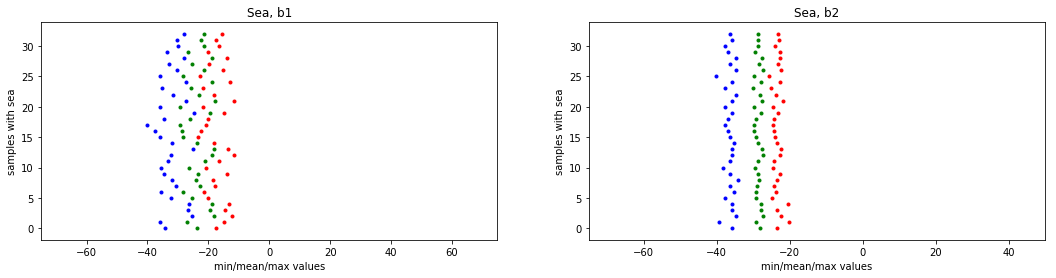

In [72]:
plt.figure(figsize=(18, 4))
samples = list(range(train_ships_fix_a_min_vals.shape[0]))
plt.subplot(141)
plt.title("Ships, b1")
plt.scatter(train_ships_fix_a_min_vals[:, 0], samples, c='b', label='mins', marker='.')
plt.scatter(train_ships_fix_a_max_vals[:, 0], samples, c='r', label='maxs', marker='.')
plt.scatter(train_ships_fix_a_mean_vals[:, 0], samples, c='g', label='mean', marker='.')
plt.xlim([-75, 75])
plt.xlabel("min/mean/max values")
plt.ylabel("samples with ship")
plt.subplot(142)
plt.title("Ships, b2")
plt.scatter(train_ships_fix_a_min_vals[:, 1], samples, c='b', label='mins', marker='.')
plt.scatter(train_ships_fix_a_max_vals[:, 1], samples, c='r', label='maxs', marker='.')
plt.scatter(train_ships_fix_a_mean_vals[:, 1], samples, c='g', label='mean', marker='.')
plt.xlim([-75, 50])
plt.xlabel("min/mean/max values")
plt.ylabel("samples with ship")



samples = list(range(train_icebergs_fix_a_min_vals.shape[0]))
plt.subplot(143)
plt.title("Icebergs, b2")
plt.scatter(train_icebergs_fix_a_min_vals[:, 0], samples, c='b', label='mins', marker='.')
plt.scatter(train_icebergs_fix_a_max_vals[:, 0], samples, c='r', label='maxs', marker='.')
plt.scatter(train_icebergs_fix_a_mean_vals[:, 0], samples, c='g', label='mean', marker='.')
plt.xlim([-75, 75])
plt.xlabel("min/mean/max values")
plt.ylabel("samples with iceberg")

plt.subplot(144)
plt.title("Icebergs, b2")
plt.scatter(train_icebergs_fix_a_min_vals[:, 1], samples, c='b', label='mins', marker='.')
plt.scatter(train_icebergs_fix_a_max_vals[:, 1], samples, c='r', label='maxs', marker='.')
plt.scatter(train_icebergs_fix_a_mean_vals[:, 1], samples, c='g', label='mean', marker='.')
plt.xlim([-75, 50])
plt.xlabel("min/mean/max values")
plt.ylabel("samples with iceberg")


samples = list(range(train_sea_fix_a_min_vals.shape[0]))
plt.figure(figsize=(18, 4))
plt.subplot(121)
plt.title("Sea, b1")
plt.scatter(train_sea_fix_a_min_vals[:, 0], samples, c='b', label='mins', marker='.')
plt.scatter(train_sea_fix_a_max_vals[:, 0], samples, c='r', label='maxs', marker='.')
plt.scatter(train_sea_fix_a_mean_vals[:, 0], samples, c='g', label='mean', marker='.')
plt.xlim([-75, 75])
plt.xlabel("min/mean/max values")
plt.ylabel("samples with sea")
plt.subplot(122)
plt.title("Sea, b2")
plt.scatter(train_sea_fix_a_min_vals[:, 1], samples, c='b', label='mins', marker='.')
plt.scatter(train_sea_fix_a_max_vals[:, 1], samples, c='r', label='maxs', marker='.')
plt.scatter(train_sea_fix_a_mean_vals[:, 1], samples, c='g', label='mean', marker='.')
plt.xlim([-75, 50])
plt.xlabel("min/mean/max values")
plt.ylabel("samples with sea")

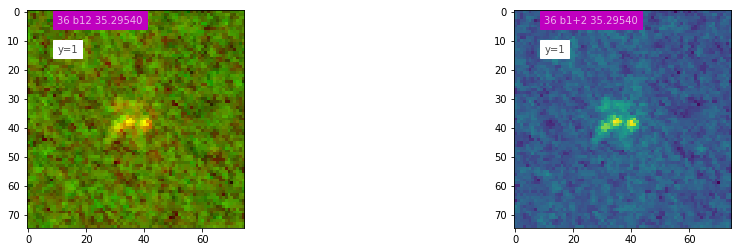

In [17]:
id_num = train_df_fix_a.index[0]
x = get_image(id_num, train_df_fix_a)
y = get_target(id_num, train_df_fix_a)
inc_angle = get_inc_angle(id_num, train_df_fix_a)

plt.figure(figsize=(16,4))
ax = plt.subplot(121)
display_image(ax, x * norm_factor(inc_angle), id_num, "b12", inc_angle, y)
ax = plt.subplot(122)
display_image(ax, 0.5*(x[:, :, 0] + x[:, :, 1]) * norm_factor(inc_angle), id_num, "b1+2", inc_angle, y)


Plot incidence angle distribution vs is_iceberg

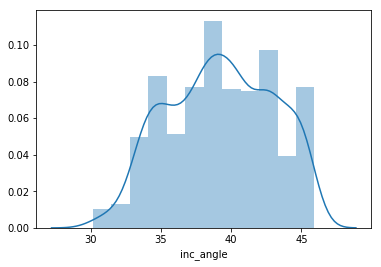

In [18]:
sns.distplot(train_icebergs_df['inc_angle'])

In [24]:
import pandas as pd
from common.dataflow import get_raw_train_df

raw_train_df = get_raw_train_df()
raw_train_df['inc_angle'] = pd.to_numeric(raw_train_df['inc_angle'], errors='coerce')

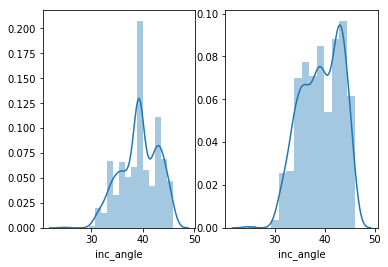

In [26]:
plt.subplot(121)
sns.distplot(train_ships_df['inc_angle'])
plt.subplot(122)
sns.distplot(raw_train_df[(raw_train_df['is_iceberg'] == 0) & (~raw_train_df['inc_angle'].isnull())]['inc_angle'])

In [32]:
raw_train_df[raw_train_df['inc_angle'].isnull()]['is_iceberg'].unique()

array([0])

In [37]:
len(train_icebergs_df), len(train_ships_df), len(raw_train_df[raw_train_df['inc_angle'].isnull()])

(753, 851, 133)